Brute force solution to below problem

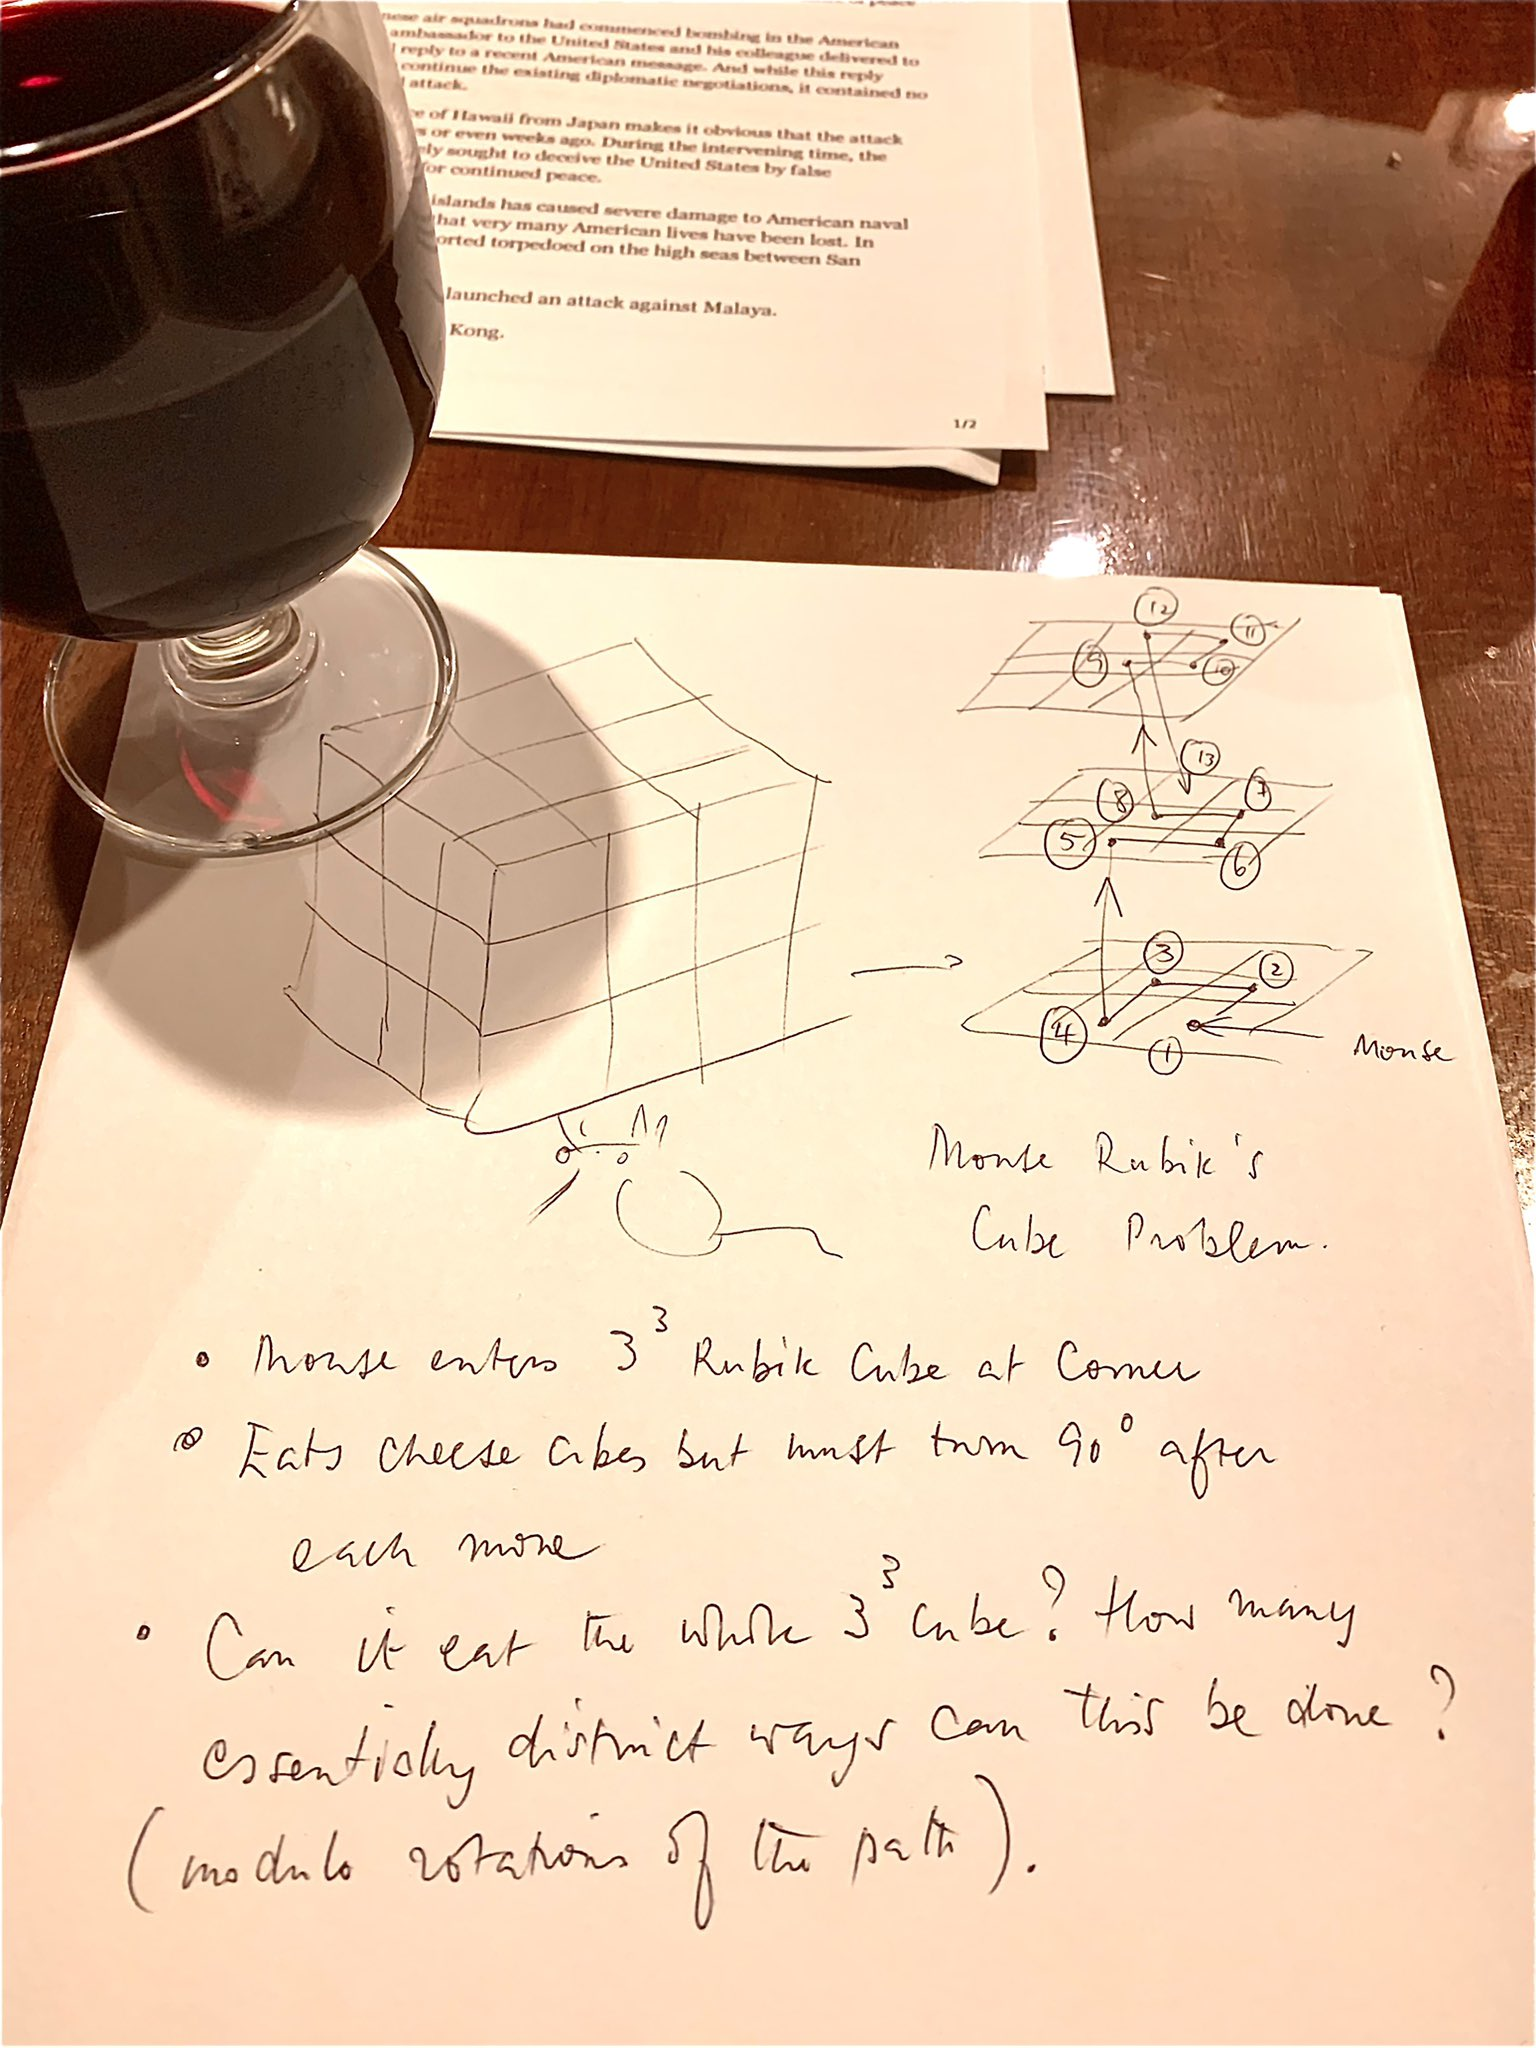

In [5]:
from IPython.display import Image
Image("Eu9g8WdVIAYfUpI.jpeg")

Assume labels are:


```
 Bottom      Middle        Top
 1, 2, 3   10, 11, 12   19, 20, 21
 4, 5, 6   13, 14, 15   22, 23, 24
 7, 8, 9   16, 17, 18   25, 26, 27
```

Make graph representing all possible connections

In [2]:
import networkx as nx

g = nx.Graph()

g.add_edge(1, 2), g.add_edge(10, 11), g.add_edge(19, 20)
g.add_edge(1, 4), g.add_edge(10, 13), g.add_edge(19, 22)
g.add_edge(1, 10), g.add_edge(10, 19)

g.add_edge(2, 3), g.add_edge(11, 12), g.add_edge(20, 21)
g.add_edge(2, 5), g.add_edge(11, 14), g.add_edge(20, 23)
g.add_edge(2, 11), g.add_edge(11, 20)

g.add_edge(3, 6), g.add_edge(12, 15), g.add_edge(21, 24)
g.add_edge(3, 12), g.add_edge(12, 21)

g.add_edge(4, 5), g.add_edge(13, 14), g.add_edge(22, 23)
g.add_edge(4, 7), g.add_edge(13, 16), g.add_edge(22, 25)
g.add_edge(4, 13), g.add_edge(13, 22)

g.add_edge(5, 6), g.add_edge(14, 15), g.add_edge(23, 24)
g.add_edge(5, 8), g.add_edge(14, 17), g.add_edge(23, 26)
g.add_edge(5, 14), g.add_edge(14, 23)

g.add_edge(6, 9), g.add_edge(15, 18), g.add_edge(24, 27)
g.add_edge(6, 15), g.add_edge(15, 24)

g.add_edge(7, 8), g.add_edge(16, 17), g.add_edge(25, 26)
g.add_edge(7, 16), g.add_edge(16, 25)

g.add_edge(8, 9), g.add_edge(17, 18), g.add_edge(26, 27)
g.add_edge(8, 17), g.add_edge(17, 26)

g.add_edge(9, 18), g.add_edge(18, 27)

len(g.edges()), len(g.nodes())

(54, 27)

Enumerate all possible illegal moves as any series of three moves that violates that 90 degree turn rule.

In [3]:
illegal = set([frozenset([i, i+1, i+2]) for i in range(1, 26, 3)])
illegal.update(set([frozenset([i, i+9, i+18]) for i in range(1, 10)]))
illegal.update(set([frozenset([i, i+3, i+6]) for i in [1, 2, 3, 10, 11, 12, 19, 20, 21]]))
len(illegal)

27

In [4]:
def next_move(g, path):
    
    # If the path completed it will be 27 moves
    # long, print it out as it is a solution
    if len(path) == len(g.nodes()):
        print(path)
    
    non_used = [ed for ed in g.edges(path[-1]) if ed[1] not in set(path)]
    for ed in non_used:
        if frozenset([path[-2], path[-1], ed[1]]) not in illegal:
            next_path = path.copy() + [ed[1]]
            next_move(g, next_path)

for e in list(g.edges()):
    
    # Print current edge for progress
    print(e)

    next_move(g, [e[0], e[1]])

(1, 2)
(1, 4)
(1, 10)
(2, 3)
(2, 5)
(2, 11)
(10, 11)
(10, 13)
(10, 19)
(11, 12)
(11, 14)
(11, 20)
(19, 20)
(19, 22)
(20, 21)
(20, 23)
(4, 5)
(4, 7)
(4, 13)
(13, 14)
(13, 16)
(13, 22)
(22, 23)
(22, 25)
(3, 6)
(3, 12)
(12, 15)
(12, 21)
(21, 24)
(5, 6)
(5, 8)
(5, 14)
(14, 15)
(14, 17)
(14, 23)
(23, 24)
(23, 26)
(6, 9)
(6, 15)
(15, 18)
(15, 24)
(24, 27)
(7, 8)
(7, 16)
(16, 17)
(16, 25)
(25, 26)
(8, 9)
(8, 17)
(17, 18)
(17, 26)
(26, 27)
(9, 18)
(18, 27)


and ... no solution